# This notebook is used to test the dataloader

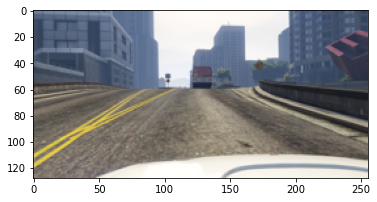

In [27]:
gta5_img = r"F:\COMP90055\GMIDA\datas\GTA5\images\00001.png"
gta5_256_img = r"F:\COMP90055\GMIDA\datas\GTA5\images256\00001.png"
cs_img = r"F:\COMP90055\GMIDA\datas\CityScapes\leftImg8bit\train\aachen\aachen_000000_000019_leftImg8bit.png"

from PIL import Image
import numpy as np
from gta5 import gta5dataset
from torch.utils.data import DataLoader
from torchvision import transforms as T
import matplotlib.pyplot as plt
from cityscapes import CityScapes
gta5_img = Image.open(gta5_img)
gta5_img = np.asarray(gta5_img,dtype= np.float32)

gta5_256_img = Image.open(gta5_256_img)
gta5_256_img = np.asarray(gta5_256_img)

cs_img = Image.open(cs_img)
cs_img = np.asarray(cs_img) 
trans = T.Compose([])
trans = T.Compose([T.ToTensor(),
                    T.Normalize([0,0, 0],[1, 1, 1])])
dataset = gta5dataset("../datas",transforms=trans)

gta5_loader = DataLoader(dataset,
                                  shuffle=True,
                                  batch_size=1,
                                  num_workers=0,
                                  pin_memory=False)
cs_loader = CityScapes(root_dir,batch_size=1,split='val')
for im_id,img,label in gta5_loader:
    """
    if call T.ToTensor() return BCHW tensor
    else return BHWC tensor 
    """
    img = img[0].permute(1,2,0).numpy().astype(np.uint8)
    plt.imshow(img)
    plt.show
    break


In [ ]:

""" 
convert label value to 
"""
CityScpates_palette = [128,64,128,244,35,232,70,70,70,102,102,156,190,153,153,153,153,153,
                        250,170,30,220,220,0,107,142,35,152,251,152,70,130,180,220,20,60,255,0,0,0,0,142,
                        0,0,70,0,60,100,0,80,100,0,0,230,119,11,32,128,192,0,0,64,128,128,64,128,0,192,
                        128,128,192,128,64,64,0,192,64,0,64,192,0,192,192,0,64,64,128,192,64,128,64,192,
                        128,192,192,128,0,0,64,128,0,64,0,128,64,128,128,64,0,0,192,128,0,192,0,128,192,
                        128,128,192,64,0,64,192,0,64,64,128,64,192,128,64,64,0,192,192,0,192,64,128,192,
                        192,128,192,0,64,64,128,64,64,0,192,64,128,192,64,0,64,192,128,64,192,0,192,192,
                        128,192,192,64,64,64,192,64,64,64,192,64,192,192,64,64,64,192,192,64,192,64,192,
                        192,192,192,192,32,0,0,160,0,0,32,128,0,160,128,0,32,0,128,160,0,128,32,128,128,
                        160,128,128,96,0,0,224,0,0,96,128,0,224,128,0,96,0,128,224,0,128,96,128,128,224,
                        128,128,32,64,0,160,64,0,32,192,0,160,192,0,32,64,128,160,64,128,32,192,128,160,
                        192,128,96,64,0,224,64,0,96,192,0,224,192,0,96,64,128,224,64,128,96,192,128,224,
                        192,128,32,0,64,160,0,64,32,128,64,160,128,64,32,0,192,160,0,192,32,128,192,160,
                        128,192,96,0,64,224,0,64,96,128,64,224,128,64,96,0,192,224,0,192,96,128,192,224,
                        128,192,32,64,64,160,64,64,32,192,64,160,192,64,32,64,192,160,64,192,32,192,192,
                        160,192,192,96,64,64,224,64,64,96,192,64,224,192,64,96,64,192,224,64,192,96,192,
                        192,224,192,192,0,32,0,128,32,0,0,160,0,128,160,0,0,32,128,128,32,128,0,160,128,
                        128,160,128,64,32,0,192,32,0,64,160,0,192,160,0,64,32,128,192,32,128,64,160,128,
                        192,160,128,0,96,0,128,96,0,0,224,0,128,224,0,0,96,128,128,96,128,0,224,128,128,
                        224,128,64,96,0,192,96,0,64,224,0,192,224,0,64,96,128,192,96,128,64,224,128,192,
                        224,128,0,32,64,128,32,64,0,160,64,128,160,64,0,32,192,128,32,192,0,160,192,128,
                        160,192,64,32,64,192,32,64,64,160,64,192,160,64,64,32,192,192,32,192,64,160,192,
                        192,160,192,0,96,64,128,96,64,0,224,64,128,224,64,0,96,192,128,96,192,0,224,192,
                        128,224,192,64,96,64,192,96,64,64,224,64,192,224,64,64,96,192,192,96,192,64,224,
                        192,192,224,192,32,32,0,160,32,0,32,160,0,160,160,0,32,32,128,160,32,128,32,160,
                        128,160,160,128,96,32,0,224,32,0,96,160,0,224,160,0,96,32,128,224,32,128,96,160,
                        128,224,160,128,32,96,0,160,96,0,32,224,0,160,224,0,32,96,128,160,96,128,32,224,
                        128,160,224,128,96,96,0,224,96,0,96,224,0,224,224,0,96,96,128,224,96,128,96,224,
                        128,224,224,128,32,32,64,160,32,64,32,160,64,160,160,64,32,32,192,160,32,192,32,
                        160,192,160,160,192,96,32,64,224,32,64,96,160,64,224,160,64,96,32,192,224,32,192,
                        96,160,192,224,160,192,32,96,64,160,96,64,32,224,64,160,224,64,32,96,192,160,96,
                        192,32,224,192,160,224,192,96,96,64,224,96,64,96,224,64,224,224,64,96,96,192,224,
                        96,192,96,224,192,0,0,0]
palette = CityScpates_palette

trans  = T.Compose([T.ToTensor()])
dataset = gta5dataset("../datas",transforms=trans)

gat5_loader = DataLoader(dataset,
                                  shuffle=True,
                                  batch_size=1,
                                  num_workers=0,
                                  pin_memory=False)

                                  


def colorize_mask(mask, palette):
    zero_pad = 256 * 3 - len(palette)
    for i in range(zero_pad):
                    palette.append(0)
    new_mask = Image.fromarray(mask.astype(np.uint8)).convert('P')
    new_mask.putpalette(palette)
    return new_mask
for i,x,y in dataloader:
    # print(i,x.size()) # B C H W
    print(x.shape) # B H W C
    print(i)
    print(y.shape) # B H W pixel is label
    x=np.array(x[0].permute(1,2,0),dtype=np.uint8)
    print(x.shape)
    plt.imshow(x)
    plt.show()
    # plt.imshow(y.squeeze(),cmap='gray')
    # plt.show()

    # yx=colorize_mask(y.squeeze().cpu().numpy(),CityScpates_palette)
    # plt.imshow(yx)
    # plt.show()

    break